In [ ]:
!pip install requests
!pip install tabulate
!pip install future
!pip install matplotlib

In [ ]:
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [73]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd

In [74]:
df = pd.read_csv('data.csv')

In [40]:
dataframe = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [41]:
y = "density_percent"
x = dataframe.columns
x.remove(y)
x

['meanWidth',
 'meanHeight',
 'meanLength',
 'meanVolume',
 'countStacking',
 'countTurnover',
 'boxesCount',
 'loadingWidth',
 'loadingHeight',
 'loadingLength']

In [42]:
splits = dataframe.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [43]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230712_170455


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          103094                 16           20           18.625        231           272           251.719

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 165.14319450216806
RMSE: 12.850805208319363
MAE: 8.427124601558337
RMSLE: 0.21691222641275978
Mean Residual Deviance: 165.14319450216806

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 169.50866921185462
RMSE: 13.019549501110037
MAE: 8.952341385555211
RMSLE: 0.22173031893455145
Mean Residual Deviance: 169.50866921185462

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     8.91027   0.73149    9.67353       8.16909       9.3236        9.30197       8.08316
mean_residual_deviance  170.719   16.7982    175.086       169.051       179.579       186.867       143.013
mse                     170.719   16.7982    175.086       169.051       179.579       186.867       143.013
r2                      0.491081  0.0672156  0.544264      0.519486      0.471285      0.382289      0.538079
residual_deviance       170.719   16.7982    175.086       169.051       179.579       186.867       143.013
rmse                    13.0527   0.658292   13.232        13.002        13.4007       13.6699       11.9588
rmsle                   0.221924  0.0226522  0.228575      0.256992      0.214501      0.213         0.196552

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-07-12 17:05:15  3.847 sec   0                  nan              nan             nan
    2023-07-12 17:05:15  3.915 sec   5                  15.7873          9.93875         249.24
    2023-07-12 17:05:15  3.997 sec   10                 14.2692          9.04903         203.61
    2023-07-12 17:05:15  4.090 sec   15                 13.4574          8.66526         181.102
    2023-07-12 17:05:15  4.202 sec   20                 13.0518          8.42963         170.35
    2023-07-12 17:05:15  4.286 sec   25                 13.1473          8.53292         172.851
    2023-07-12 17:05:15  4.387 sec   30                 12.8653          8.41862         165.515
    2023-07-12 17:05:15  4.419 sec   32                 12.8508          8.42712         165.143

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
meanHeight     626572                 1                    0.179648
meanWidth      526590                 0.84043              0.150982
meanLength     399790                 0.638059             0.114626
meanVolume     380629                 0.607479             0.109133
loadingWidth   328935                 0.524976             0.0943111
boxesCount     299964                 0.478739             0.0860047
countStacking  272268                 0.434535             0.0780636
loadingHeight  259681                 0.414447             0.0744546
loadingLength  248653                 0.396847             0.071293
countTurnover  144686                 0.230917             0.0414839

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch 

In [44]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20230712_170455,13.0195,169.509,8.95234,0.22173,169.509
StackedEnsemble_BestOfFamily_3_AutoML_1_20230712_170455,13.0421,170.096,8.91308,0.221473,170.096
StackedEnsemble_AllModels_2_AutoML_1_20230712_170455,13.0486,170.267,8.83587,0.220526,170.267
StackedEnsemble_BestOfFamily_4_AutoML_1_20230712_170455,13.0581,170.514,8.75626,0.221269,170.514
XRT_1_AutoML_1_20230712_170455,13.0586,170.526,8.95932,0.220924,170.526
StackedEnsemble_AllModels_1_AutoML_1_20230712_170455,13.0861,171.246,8.89609,0.221412,171.246
StackedEnsemble_BestOfFamily_2_AutoML_1_20230712_170455,13.1262,172.297,8.93126,0.222218,172.297
StackedEnsemble_AllModels_3_AutoML_1_20230712_170455,13.1658,173.339,8.98344,0.225346,173.339
GBM_grid_1_AutoML_1_20230712_170455_model_8,13.2546,175.685,8.47082,0.223968,175.685
GBM_grid_1_AutoML_1_20230712_170455_model_18,13.2569,175.746,9.07564,0.224153,175.746


In [66]:
performance = aml.leader.model_performance(test)
print(performance)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 177.41687491344263
RMSE: 13.31979260024129
MAE: 8.937322776592694
RMSLE: 0.22219023706346863
Mean Residual Deviance: 177.41687491344263


In [45]:
pred = aml.predict(test)
pred.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
90.6152
64.4386
81.1525
84.7949
84.6027
88.0965
85.0585
81.6221
87.2129
84.0959


In [60]:
test_df = test.as_data_frame()
pred_df = pred.as_data_frame()

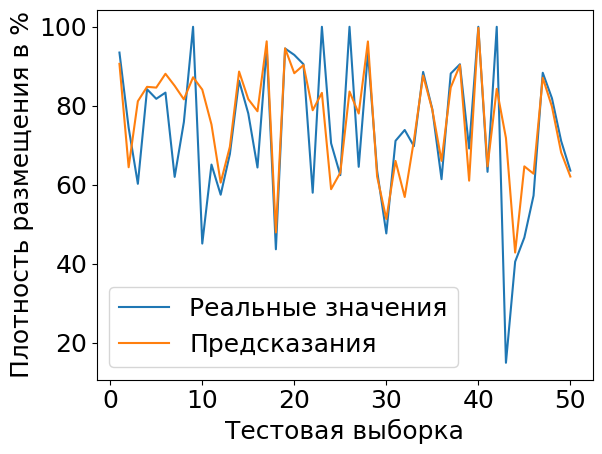

In [62]:
plt.plot(list(range(1, 51)), test_df['density_percent'][:50],  label="Реальные значения")
plt.plot(list(range(1, 51)), pred_df[:50], label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.show()